In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [151]:
df = pd.read_csv(r"C:\Users\dulin\Churn_course\Mini Project 0\hmQOVnDvRN.xls")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 1.1 Initial Data Assessment

In [152]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [153]:
df.isna().sum()         #No missing values recorded

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [154]:
numeric_columns = ['tenure','MonthlyCharges','TotalCharges']

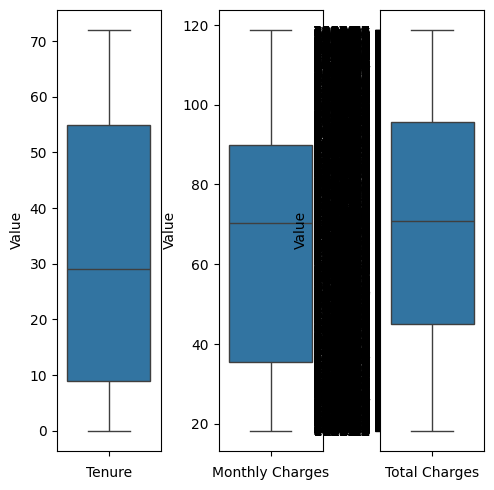

In [155]:
fig, ax = plt.subplots(1, 3, figsize=(5, 5)) 
fig.tight_layout()

sns.boxplot(data=df['tenure'], ax = ax[0])
ax[0].set_xlabel("Tenure")
ax[0].set_ylabel("Value")

sns.boxplot(data=df['MonthlyCharges'], ax = ax[1])
ax[1].set_xlabel("Monthly Charges")
ax[1].set_ylabel("Value")

sns.boxplot(data=df['TotalCharges'], ax = ax[2])
ax[2].set_xlabel("Total Charges")
ax[2].set_ylabel("Value")

plt.show()



In [156]:
#The Plots shows there are no outliers


In [157]:
Customer_Demographics = 'gender', 'SeniorCitizen', 'Partner', 'Dependents' 
Account_Information= 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod'
Services = 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'
Financial=  'MonthlyCharges', 'TotalCharges'

### 1.2 Class Imbalance Analysis

Text(0.5, 1.0, 'Churn variable value counts')

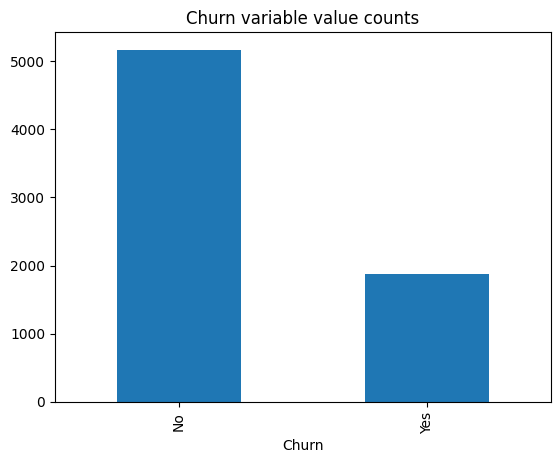

In [158]:
fig = df['Churn'].value_counts().plot(kind='bar')
fig.set_title("Churn variable value counts")

The Plot clearly shows that there is a class imbalance between the churn and non churn classes in the target variable

In [159]:
churn_class = df['Churn'].value_counts()[0]
non_churn_class = df['Churn'].value_counts()[1]

imbalance_ratio = churn_class/non_churn_class
print("The Imbalance Ratio of the target variable of the dataset - ",imbalance_ratio)

The Imbalance Ratio of the target variable of the dataset -  2.7683253076511503


C:\Users\dulin\AppData\Local\Temp\ipykernel_16116\3803234663.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_class = df['Churn'].value_counts()[0]
C:\Users\dulin\AppData\Local\Temp\ipykernel_16116\3803234663.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  non_churn_class = df['Churn'].value_counts()[1]


The target variable has an imbalance ratio of 2.768. This implies that for 1 non churn record, there are almost 3 churn records. This clearly shows that there is a class imbalance in the dataset with majority of the records being non churn class.


##### Analyzing churn patterns across different customer segments

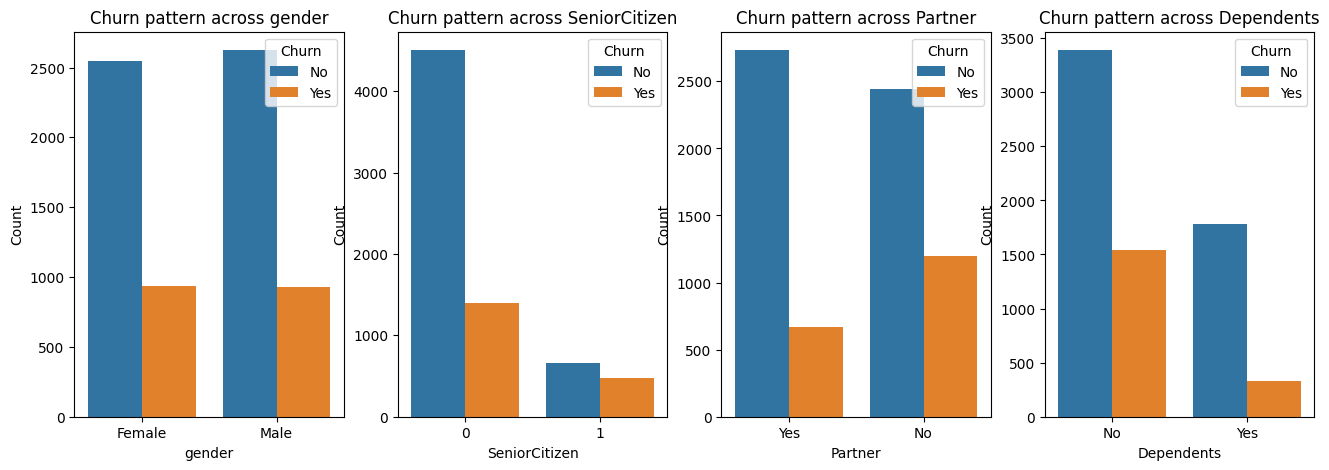

In [160]:
fig, ax = plt.subplots(1,4,figsize=(16, 5))

for count,i in enumerate(Customer_Demographics):
    sns.countplot(data=df, x=i, hue='Churn',ax=ax[count])  
    ax[count].set_title(f'Churn pattern across {i}')
    ax[count].set_xlabel(i)
    ax[count].set_ylabel("Count")

##### Business Context: Why class imbalance matters in churn prediction

Class imbalance matter in churn prediction because when there are significantly more data records for 1 class than the other, the model becomes biased towards the majority class because of the model learning patterns from the majority class data records. It is  important that we handle the imbalance in order to get a accurate model.

In [161]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 1.3 Advanced Univariate Analysis

### Numerical Features

##### Distribution analysis

In [162]:
for numeric_column in numeric_columns:
    df[numeric_column] = df[numeric_column].apply(pd.to_numeric, errors='coerce')


categorcal_features = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]

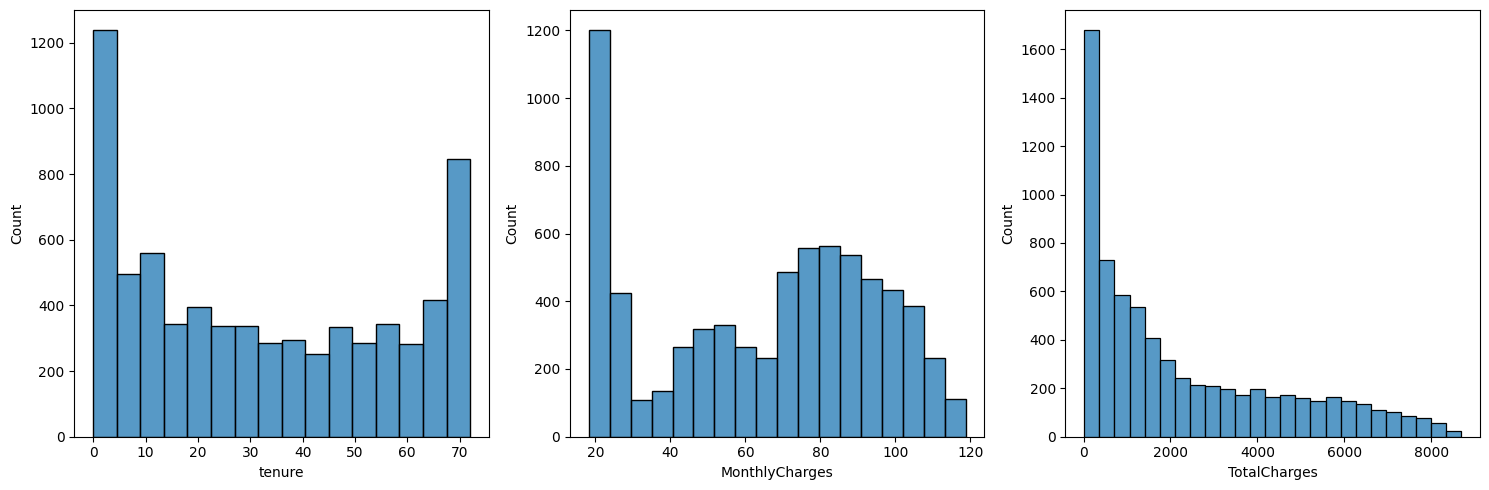

In [163]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

for count,i in enumerate(numeric_columns):
    sns.histplot(data=df,x=i, ax=ax[count])

plt.tight_layout()
plt.show()

Taking a look at the 'Tenure' plot, the noticable deviations are 0 and around 70. Which explains that the new customer count and oldest customer count is the highest. The 'MonthlyCharges' plots a noticable difference between the 1st bin and rest of the bins. Which tells us that the most number of customers in our dataset is customers that have the lowest Monthly charges. The 'Total Charges' column also shows some big highlight for the first bin which tell and the customers with minimum or zero total charges are the highest in the dataset and it alligns with the observation we had with the monthly charges column values. The rest of the value counts for the higher values gets dropped as higher the TotalCharges value gets.

##### Outlier detection using IQR and Z-score methods

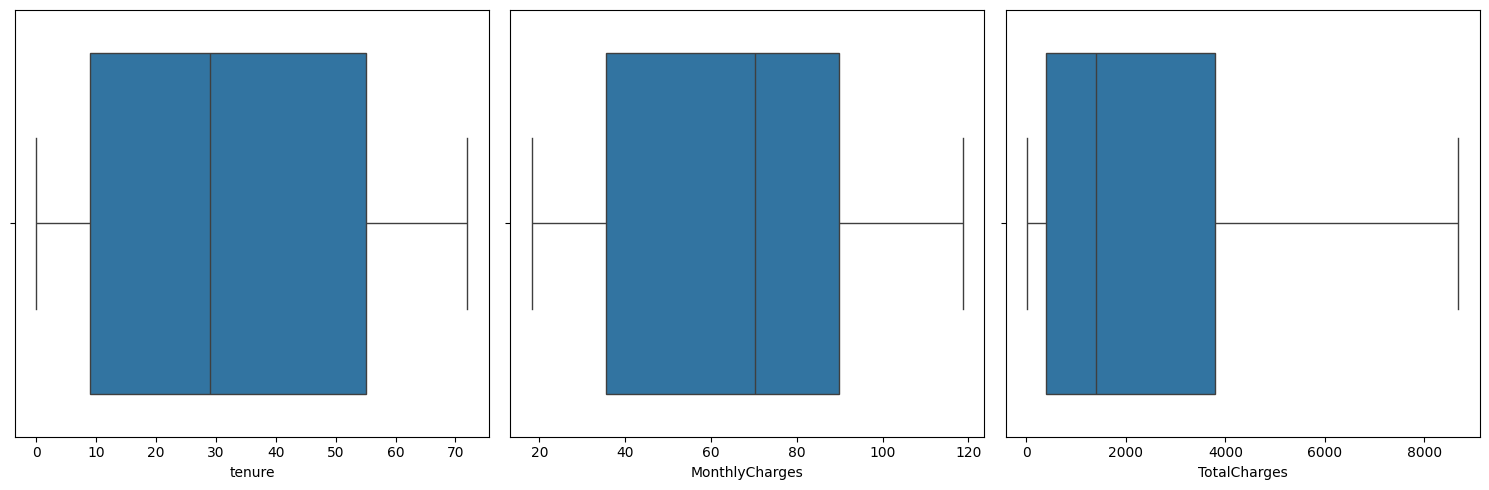

In [164]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

for count,i in enumerate(numeric_columns):
    sns.boxplot(data=df,x=i, ax=ax[count])

plt.tight_layout()
plt.show()

The above boxplots for the numerical variables shows no signs of having outliers in the dataset. To confirm the above observation, below methods were applied to the numerical columns.

##### IQR Method

In [165]:
def find_anomaly_IQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    Iqr = Q3 - Q1

    upper_bound = Q3 + 1.5*Iqr
    lower_bound = Q1 - 1.5*Iqr

    return(data>upper_bound) | (data<lower_bound)


for col in numeric_columns:
    n_outliers = find_anomaly_IQR(df[col]).sum()
    n_outlier_percentage  = n_outliers/len(df[col])*100
    print(f"{col} : {n_outliers} outliers found as a percentage of {n_outlier_percentage}")

tenure : 0 outliers found as a percentage of 0.0
MonthlyCharges : 0 outliers found as a percentage of 0.0
TotalCharges : 0 outliers found as a percentage of 0.0


##### Z Score Method

In [166]:
def find_anomaly_Z(data):
    mean = data.mean()
    std = data.std()
    z_score = (data - mean) / std

    return data[np.abs(z_score) > 3]


for col in numeric_columns:
    n_outliers = find_anomaly_Z(df[col]).sum()
    n_outlier_percentage  = n_outliers/len(df[col])*100
    print(f"{col} : {n_outliers} outliers found as a percentage of {n_outlier_percentage}")



tenure : 0 outliers found as a percentage of 0.0
MonthlyCharges : 0.0 outliers found as a percentage of 0.0
TotalCharges : 0.0 outliers found as a percentage of 0.0


### Categorical Features

#### Frequency Analysis

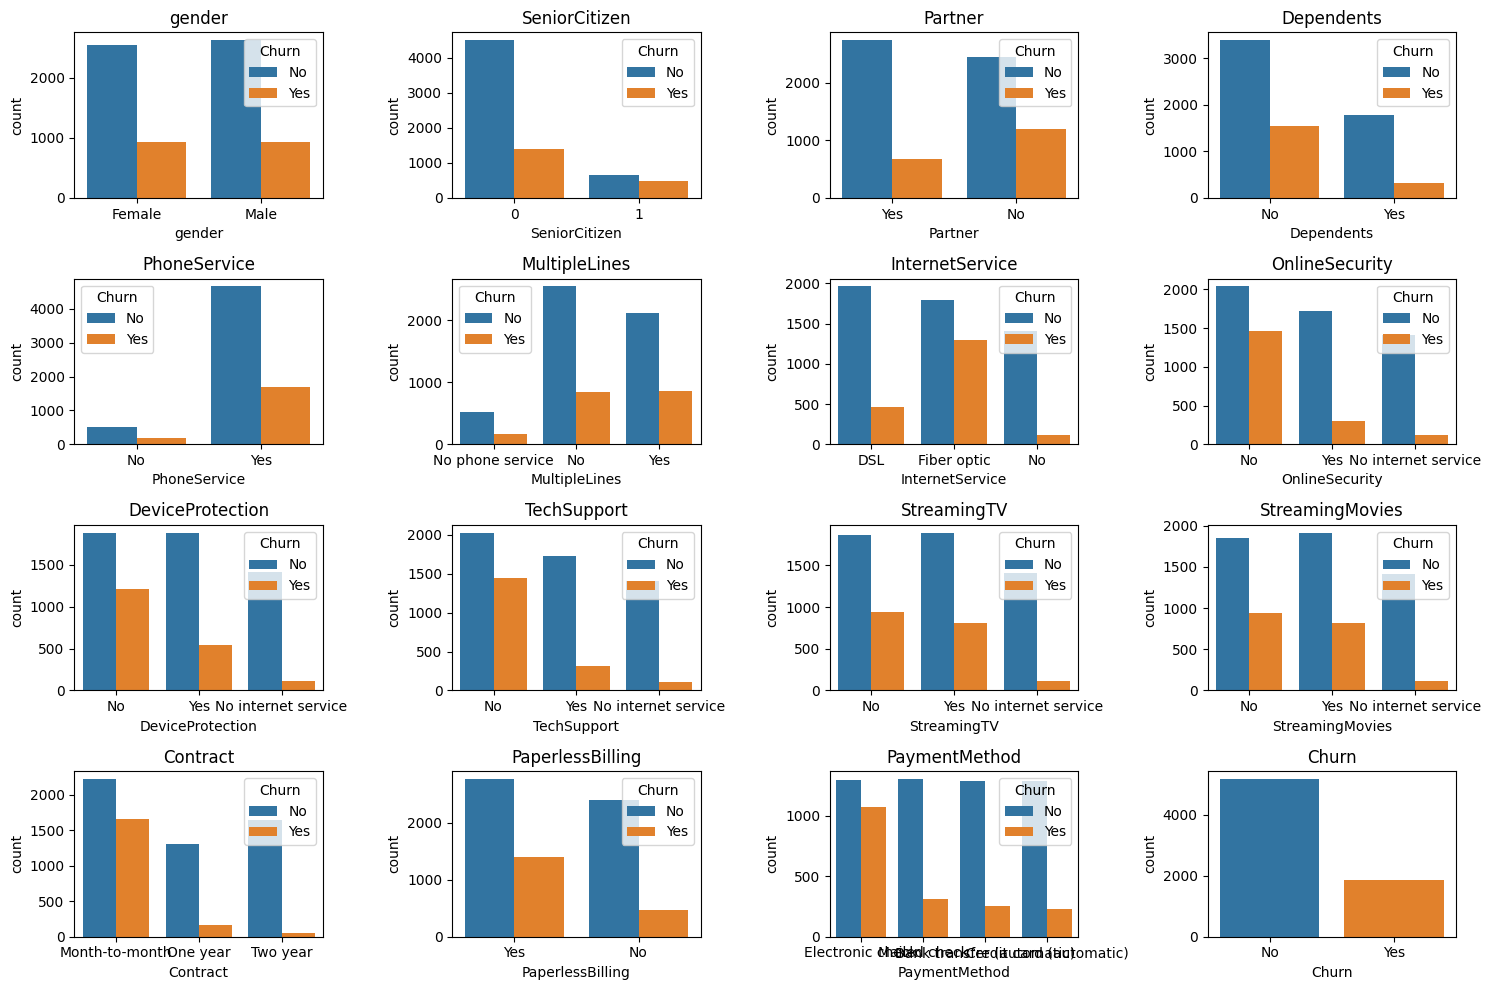

In [167]:

figure, ax = plt.subplots(4,4, figsize = (15,10))
ax= ax.flatten()

for count, col in enumerate(categorcal_features):
    sns.countplot(data=df, x=col, hue='Churn', ax=ax[count])
    ax[count].set_title(col)

plt.tight_layout()


The above set of chart shows the counts of each value in the categorical variables in our dataset and how each of those values represents the connection to the target variable 'Churn'. We can get an idea of the behaviors of the data we are dealing with using this kind of Charts.

## 1.4 Comprehensive Bivariate Analysis

### Churn vs Demographics

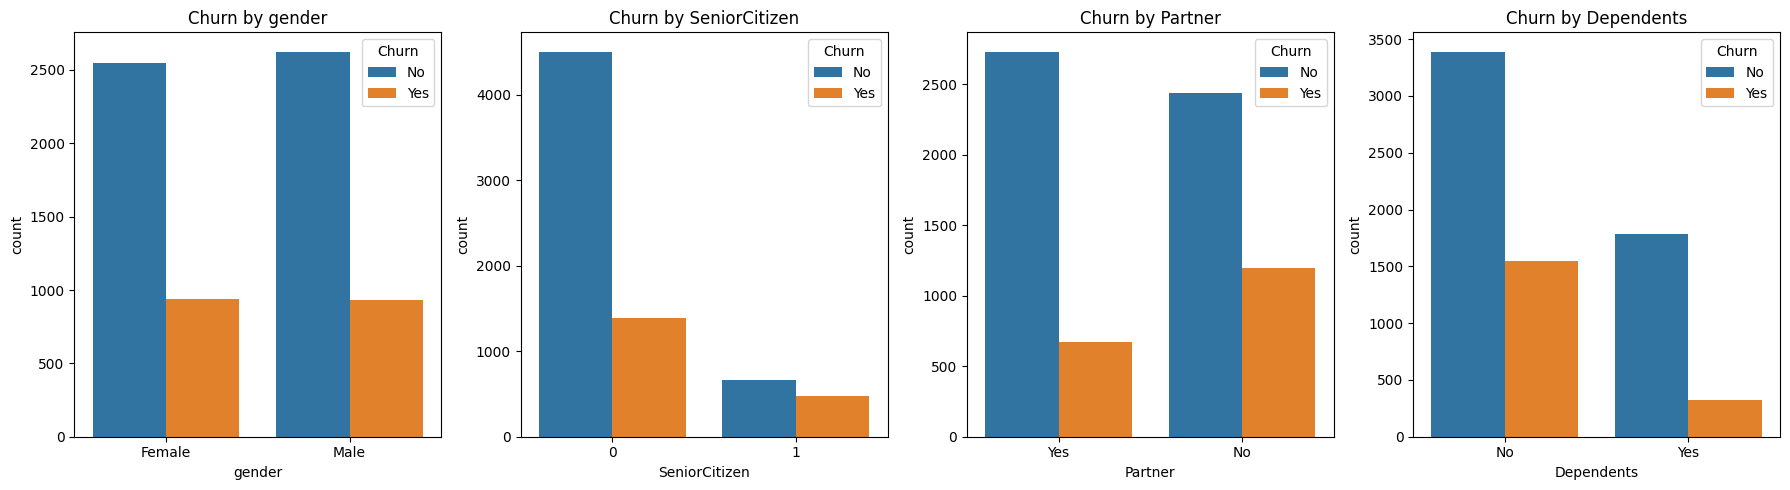

In [168]:
fig, ax = plt.subplots(1, len(Customer_Demographics), figsize=(18,5))

for i, col in enumerate(Customer_Demographics):
    sns.countplot(data=df, x=col, hue='Churn', ax=ax[i])
    ax[i].set_title(f'Churn by {col}')
    
plt.tight_layout()
plt.show()

### Churn vs Services

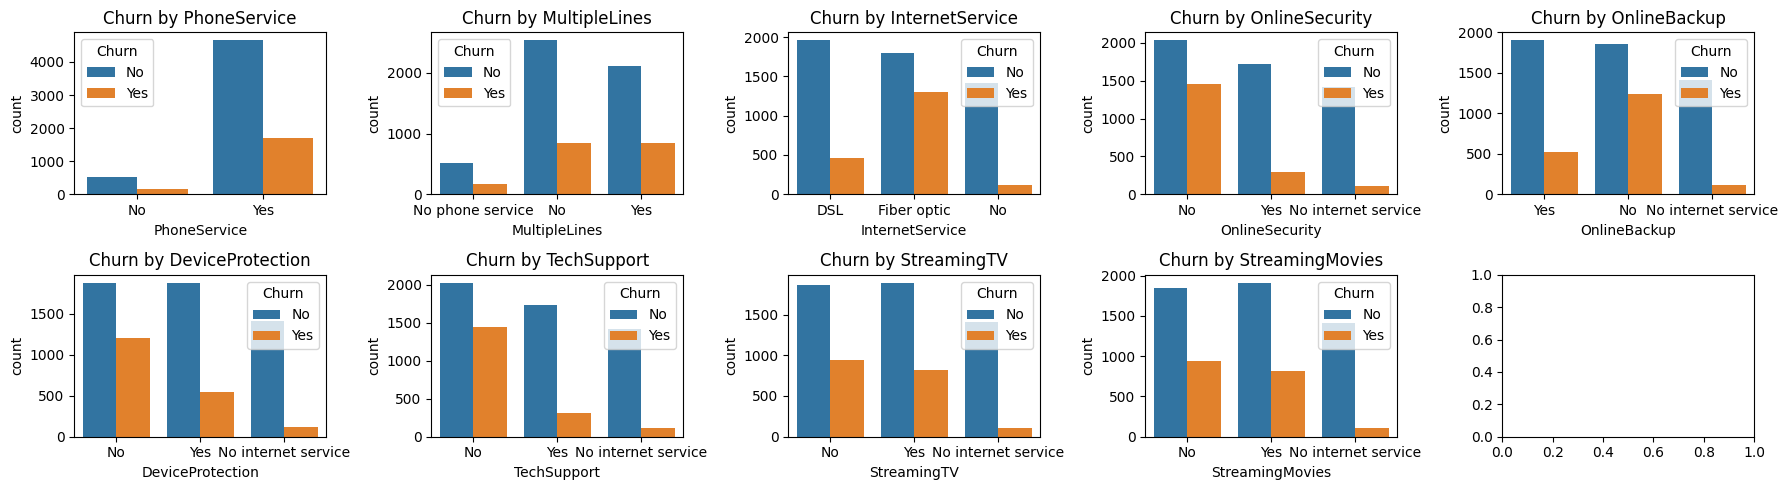

In [169]:
fig, ax = plt.subplots(2, 5, figsize=(18,5))
ax = ax.flatten()  


for i, col in enumerate(Services):
    sns.countplot(data=df, x=col, hue='Churn', ax=ax[i])
    ax[i].set_title(f'Churn by {col}')
    
plt.tight_layout()
plt.show()

### Churn vs Financial

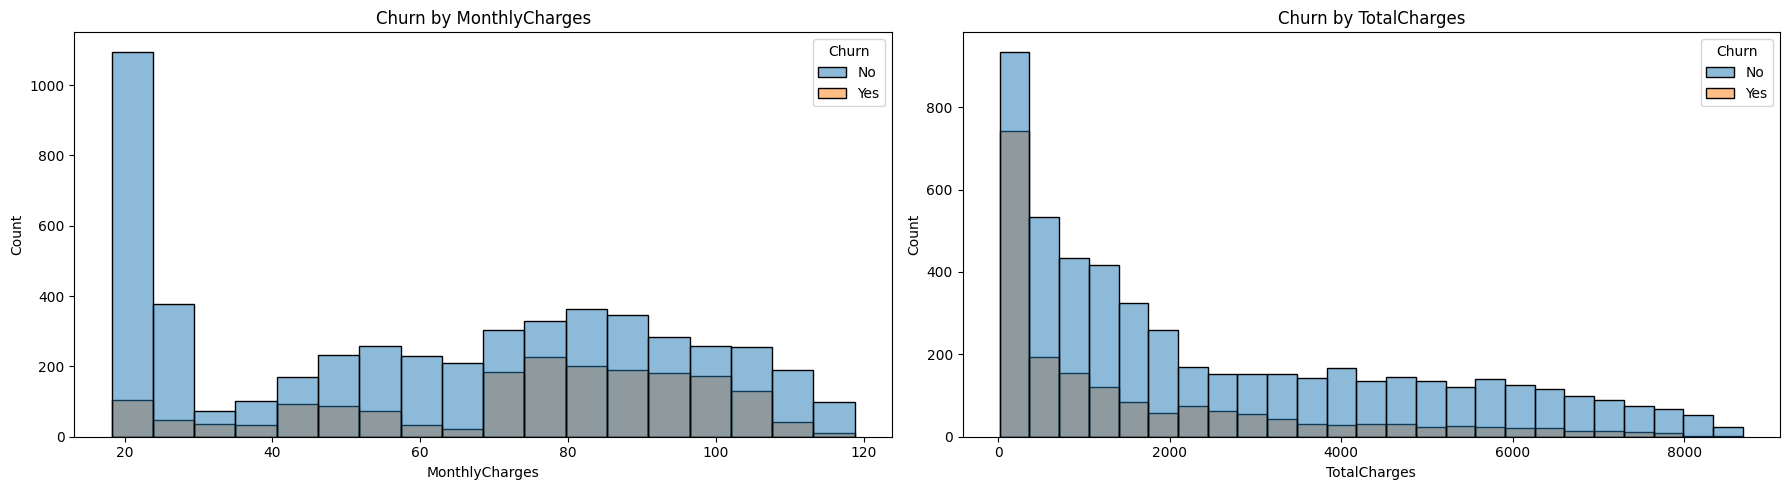

In [170]:
fig, ax = plt.subplots(1, len(Financial), figsize=(18,5))

for i, col in enumerate(Financial):
    sns.histplot(data=df, x=col, hue='Churn', ax=ax[i])
    ax[i].set_title(f'Churn by {col}')
    
plt.tight_layout()
plt.show()

### Churn vs Account

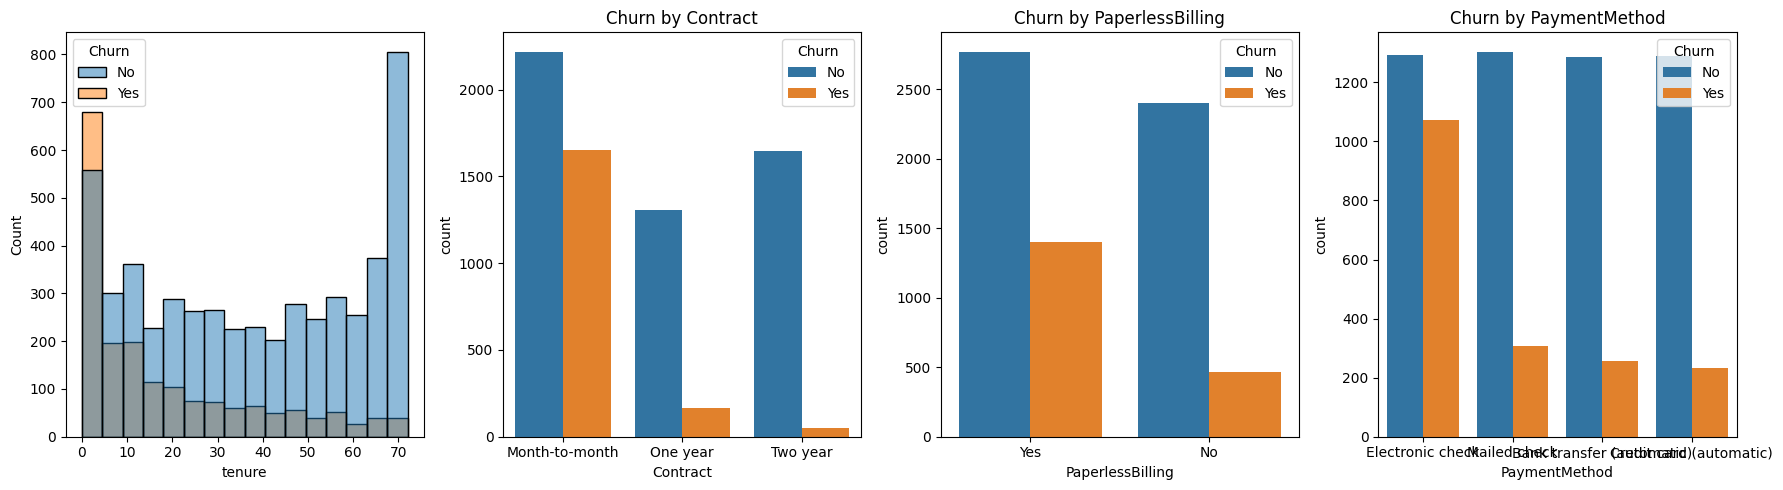

In [171]:
fig, ax = plt.subplots(1, len(Account_Information), figsize=(18,5))

for i, col in enumerate(Account_Information):
    if col == 'tenure':
        sns.histplot(data=df, x=col, hue='Churn', ax=ax[i])
    else:
        sns.countplot(data=df, x=col, hue='Churn', ax=ax[i])
        ax[i].set_title(f'Churn by {col}')
    
plt.tight_layout()
plt.show()

## 1.5 Multivariate Analysis

### Correlation Matrix

<Axes: >

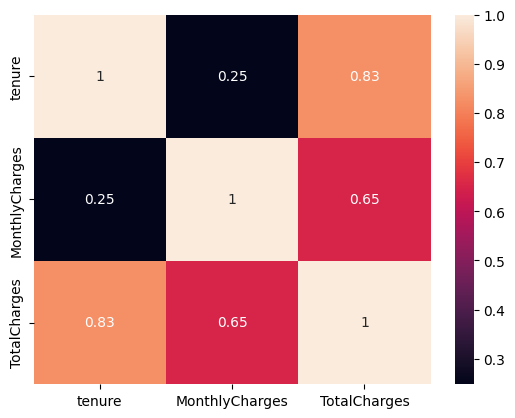

In [172]:
correlation = df[numeric_columns].corr()
sns.heatmap(correlation, annot=True)

### Feature Interactions

### Customer Segmentation

## 1.6 Business Insights Generation

### High-Risk Customer Profiles

### Retention Opportunities:

### Revenue Impact:

# Part 2: Advanced Model Pipeline & Ensemble Methods

## 2.1 Data Preprocessing Pipeline

In [173]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [174]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [175]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


In [176]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [177]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

### Feature Engineering

In [178]:
def TenureGroup(tenure):
    if tenure <= 12:
        return "New"
    elif tenure > 12 and tenure <= 50:
        return "Established"
    else:
        return "Loyal"

df['Tenure_Cat'] = df['tenure'].apply(TenureGroup)

In [179]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']

df['service_count'] = df[services].apply(lambda x: sum(x == 'Yes'), axis = 1)          #axis = 1 means we are applying the function across rows and x is the row


In [180]:

df['Avg_Monthly_Charges_per_service'] = df['MonthlyCharges']/df['service_count'].replace(0, np.nan)  


In [181]:
reliable_pay = ['Bank transfer (automatic)','Credit card (automatic)']

df['Payment_Reliability'] = df['PaymentMethod'].apply(lambda x: 1 if x in reliable_pay else 0)      #Automatic payments can be considered more reliable.


In [182]:
categorcal_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [183]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [184]:
Le = LabelEncoder()
df_label = df.copy()
for col in categorcal_features:
    df_label[col] = Le.fit_transform(df_label[col])
df_label

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Cat,service_count,Avg_Monthly_Charges_per_service,Payment_Reliability
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,Yes,0,0,0,0,0,1,2,29.85,29.85,0,New,1,29.850000,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,No,2,0,0,0,1,0,3,56.95,1889.50,0,Established,3,18.983333,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,Yes,0,0,0,0,0,1,3,53.85,108.15,1,New,3,17.950000,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,No,2,2,0,0,1,0,0,42.30,1840.75,0,Established,3,14.100000,1
4,9237-HQITU,0,0,0,0,2,1,0,1,0,No,0,0,0,0,0,1,2,70.70,151.65,1,New,1,70.700000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,No,2,2,2,2,1,1,3,84.80,1990.50,0,Established,7,12.114286,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,Yes,2,0,2,2,1,1,1,103.20,7362.90,0,Loyal,6,17.200000,1
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,No,0,0,0,0,0,1,2,29.60,346.45,0,New,1,29.600000,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,No,0,0,0,0,0,1,3,74.40,306.60,1,New,2,37.200000,0


In [185]:
df_onehot = df.copy()  

df_onehot = pd.get_dummies(df_onehot, columns=categorcal_features, drop_first=True)
df_onehot

,customerID,tenure,OnlineBackup,MonthlyCharges,TotalCharges,Tenure_Cat,service_count,Avg_Monthly_Charges_per_service,Payment_Reliability,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,Yes,29.85,29.85,New,1,29.850000,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,34,No,56.95,1889.50,Established,3,18.983333,0,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,2,Yes,53.85,108.15,New,3,17.950000,0,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,45,No,42.30,1840.75,Established,3,14.100000,1,True,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,2,No,70.70,151.65,New,1,70.700000,0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,No,84.80,1990.50,Established,7,12.114286,0,True,False,True,True,True,False,True,False,False,False,True,False,True,False,True,False,True,False,True,True,False,True,False,False,True,False
7039,2234-XADUH,72,Yes,103.20,7362.90,Loyal,6,17.200000,1,False,False,True,True,True,False,True,True,False,False,False,False,True,False,False,False,True,False,True,True,False,True,True,False,False,False
7040,4801-JZAZL,11,No,29.60,346.45,New,1,29.600000,0,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
7041,8361-LTMKD,4,No,74.40,306.60,New,2,37.200000,0,True,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True


Above 2 tables are the results of 2 different encoding stratergies. Label encoding is applied to the first one and it turns the same categorical colummns into numerical using set of numbers with order. One hot encoding is applied to the 2 table and it creates an new column for every unique value in the categorical column. The coorect way is to apply both techniques to our dataset based on the type of categorical column. Label encoding should be applied to ordinal columns where there is an order for the values so that label encoding can replicate that order with integers. One hot encoding shoould be applied to nominal columns where there is no particular order for the column values.

In [186]:
ordinal_cols = ['Contract', 'Tenure_Cat']
nominal_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']

In [187]:
for col in ordinal_cols:
    df[col] = Le.fit_transform(df[col])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Cat,service_count,Avg_Monthly_Charges_per_service,Payment_Reliability
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,No,2,1,29.850000,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.50,No,0,3,18.983333,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,Yes,2,3,17.950000,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840.75,No,0,3,14.100000,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,Yes,2,1,70.700000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,1,Yes,Mailed check,84.80,1990.50,No,0,7,12.114286,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,1,Yes,Credit card (automatic),103.20,7362.90,No,1,6,17.200000,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,0,Yes,Electronic check,29.60,346.45,No,2,1,29.600000,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,0,Yes,Mailed check,74.40,306.60,Yes,2,2,37.200000,0


In [188]:
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
df

,customerID,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,Tenure_Cat,service_count,Avg_Monthly_Charges_per_service,Payment_Reliability,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,29.85,29.85,No,2,1,29.850000,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,1,56.95,1889.50,No,0,3,18.983333,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True
2,3668-QPYBK,0,2,0,53.85,108.15,Yes,2,3,17.950000,0,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,1,42.30,1840.75,No,0,3,14.100000,1,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False
4,9237-HQITU,0,2,0,70.70,151.65,Yes,2,1,70.700000,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,1,84.80,1990.50,No,0,7,12.114286,0,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,False,True
7039,2234-XADUH,0,72,1,103.20,7362.90,No,1,6,17.200000,1,False,True,True,True,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,True,False,False
7040,4801-JZAZL,0,11,0,29.60,346.45,No,2,1,29.600000,0,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
7041,8361-LTMKD,1,4,0,74.40,306.60,Yes,2,2,37.200000,0,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


In [189]:
numeric_columns = ['tenure','MonthlyCharges','TotalCharges','service_count','Avg_Monthly_Charges_per_service']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [190]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

In [191]:
df.dtypes

customerID                                object
SeniorCitizen                              int64
tenure                                   float64
Contract                                   int32
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
Tenure_Cat                                 int32
service_count                            float64
Avg_Monthly_Charges_per_service          float64
Payment_Reliability                        int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes  

## 2.2 Ensemble Model Implementation